# imports to be used

In [1]:
# importing the neccessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

# Reading data from the datasets 2018 Crime Statistics by Category of Crime

In [2]:
#  using set option attribute to display the rows and columns
pd.set_option('display.max_rows',127)
pd.set_option('display.max_columns',38)

In [3]:
#display the dataset given 
df=pd.read_csv("2018CrimeStatisticsByCategoryOfCrime.csv",header=None,) 
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,NaN,NaN,REPORTED CASES,NaN,NaN,NaN,PERFOMANCE,NaN,NaN,NaN,NaN,PERSONS TAKEN TO COURT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SENTENCES IMPOSED BY COURTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACCUSED CHARGED,NaN,NaN,NaN,ACCUSED CONVICTED,NaN,NaN,NaN,NaN,NaN,NaN,IMPRISONMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VICTIMS OF CRIME,NaN,NaN,NaN,VALUE PROPERTY(UGSHS.),NaN
2,NaN,NaN,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
3,S/No.,CASE/CRIME INCIDENCES,1,2,3,4,5,6,7,8,9,10,NaN,NaN,NaN,11,NaN,NaN,NaN,12,13,14,NaN,NaN,NaN,15,16,17,18,19,20,21,NaN,NaN,NaN,22,23,24
4,NaN,HOMICIDES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,98,UWA Statute,648,112,89,447,485,269,8,26,144,609,7,17,-,377,-,11,-,10,42,193,249,3,4,-,-,107,-,15,10,172222000,608,-,8,-,26000000,26000000
124,99,Local Government Act,4,2,1,1,1,-,-,-,1,1,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,-,-,-,-,4,-,-,-,-,-
125,100,All other Acts,821,345,189,287,430,173,7,19,93,641,12,76,-,323,8,44,-,1,56,297,121,2,3,-,-,120,21,41,60,69060000,710,10,62,9,241790000,440000
126,NaN,Sub Total(Other Laws),3006,749,620,1637,1885,991,24,127,500,3592,49,416,138,2183,54,314,19,29,280,1316,1291,7,18,-,-,810,21,292,123,518202000,2676,10,115,9,274390000,26440000


# We shall start defining the column tuples and then use pandas methods to create pandas multilevel header

In [4]:
# listing of columns names of the dataset
columns=[
       ('REPORTED CASES','Total Cases'),('REPORTED CASES','Cases under Inquiry'),
    ('REPORTED CASES','Not Detected/NPW'),('REPORTED CASES','Cases taken to court'),
    
    ('PERFORMANCE','Cases submitted toDPP/RSA'),('PERFORMANCE','Cases with convictions'),
    ('PERFORMANCE','Cases with Acquittals'),('PERFORMANCE','Cases Dismissed'),
    ('PERFORMANCE','Cases pending in Court'),
    
    ('PERSONS TAKEN TO COURT','ACCUSED CHARGED','Male Adult'),('PERSONS TAKEN TO COURT','ACCUSED CHARGED','Male Juven.')
    ,('PERSONS TAKEN TO COURT','ACCUSED CHARGED','Female Adult'),('PERSONS TAKEN TO COURT','ACCUSED CHARGED','Female Juven.'),
    ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Male Adult'),('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Male Juven.'),
    ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Female Adult'), ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Female Juven.'),
    ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Acquitted'),('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Discharged'),
    ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Awaiting Trial'),
    
    
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Male Adult'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Male Juven.')
    ,('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Female Adult')
    ,('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Female Juven.'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Death'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Fined'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Probation Bound Over'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','CAUTION'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','COMM. WORK'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Fines Awarded (UgShs.)'),
    ('SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME','Male Adult'),
    ('SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME','Male Juven.')
    ,('SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME','Female Adult'),
    ('SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME','Female Juven.'),
    ('SENTENCES IMPOSED BY COURTS','VALUE PROPERTY(UGSHS.)','Lost'),
    ('SENTENCES IMPOSED BY COURTS','VALUE PROPERTY(UGSHS.)','Recovered')
    
        ]
columns

[('REPORTED CASES', 'Total Cases'),
 ('REPORTED CASES', 'Cases under Inquiry'),
 ('REPORTED CASES', 'Not Detected/NPW'),
 ('REPORTED CASES', 'Cases taken to court'),
 ('PERFORMANCE', 'Cases submitted toDPP/RSA'),
 ('PERFORMANCE', 'Cases with convictions'),
 ('PERFORMANCE', 'Cases with Acquittals'),
 ('PERFORMANCE', 'Cases Dismissed'),
 ('PERFORMANCE', 'Cases pending in Court'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CHARGED', 'Male Adult'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CHARGED', 'Male Juven.'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CHARGED', 'Female Adult'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CHARGED', 'Female Juven.'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CONVICTED', 'Male Adult'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CONVICTED', 'Male Juven.'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CONVICTED', 'Female Adult'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CONVICTED', 'Female Juven.'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CONVICTED', 'Acquitted'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CON

In [5]:
# getting data from specific rows and columns 
dcf=df.loc[4:,2:]
dcf


,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,190,117,29,44,74,3,1,1,39,85,-,-,-,4,-,-,-,1,1,79,4,-,-,-,-,-,-,-,-,-,197,4,17,-,11500000,-
6,636,431,109,96,176,2,-,1,93,194,-,10,-,3,-,-,-,-,3,198,3,-,-,-,-,-,-,-,-,-,619,11,25,1,-,-
7,81,54,12,15,17,-,-,-,15,9,-,9,-,-,-,-,-,-,-,18,-,-,-,-,-,-,-,-,-,-,65,9,14,4,-,-
8,362,107,24,231,239,15,-,2,214,208,4,73,2,7,1,6,-,-,4,269,3,1,10,-,-,-,-,-,-,-,174,25,138,16,-,-
9,42,25,11,6,14,-,-,-,6,8,2,3,-,-,-,-,-,-,-,13,-,-,-,-,-,-,-,-,-,-,16,24,7,19,-,-
10,3186,1740,626,820,1259,25,2,8,785,1062,29,126,3,27,2,-,-,3,16,1172,26,1,-,-,-,1,-,-,1,-,2475,192,473,104,600000,-
11,4497,2474,811,1212,1779,45,3,12,1152,1566,35,221,5,41,3,6,-,4,24,1749,36,2,10,-,-,1,-,-,1,-,3546,265,674,144,12100000,-
12,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,199,172,19,8,48,3,-,-,5,10,-,1,-,5,-,-,-,-,-,6,4,-,-,-,-,1,-,-,-,3000000,178,-,13,-,54403285118,602281000


In [6]:
# setting the column names as multiIndex 
dcf.columns=pd.MultiIndex.from_tuples(columns)
dcf

REPORTED CASES                                                            \
       Total Cases Cases under Inquiry Not Detected/NPW Cases taken to court   
               NaN                 NaN              NaN                  NaN   
4              NaN                 NaN              NaN                  NaN   
5              190                 117               29                   44   
6              636                 431              109                   96   
7               81                  54               12                   15   
8              362                 107               24                  231   
9               42                  25               11                    6   
10            3186                1740              626                  820   
11            4497                2474              811                 1212   
12               -                   -                -                    -   
13             199                 172               19                    8   
14              58                  49                6                    3   
15              50                  39               11                    -   
16             541                 215              159                  167   
17             898                 525              186                  187   
18             344                 221               80                   43   
19              17                  15                1                    1   
20           12313                5776             3936                 2601   
21             198                 142               40                   16   
22             345                 171              124                   50   
23             136                  86               13                   37   
24           15099                7411             4575                 3113   
25               -                   -                -                    -   
26               -                   -                -                    -   
27            1580                 618              318                  644   
28           15366                6166             3615                 5585   
29             396                 118              114                  164   
30              79                  29               34                   16   
31             100                  30               25                   45   
32           17521                6961             4106                 6454   
33               -                   -                -                    -   
34            6757                2499             3865                  393   
35            2299                 752             1430                  117   
36             245                  97               95                   53   
37              84                  33               25                   26   
38             612                 265              248                   99   
39            1449                 445              926                   78   
40              51                  13               21                   17   
41              92                  42               39                   11   
42           11589                4146             6649                  794   
43               -                   -                -                    -   
44            6867                2256             1511                 3100   
45            3368                1038              693                 1637   
46            2000                 670              390                  940   
47             447                 223               84                  140   
48            1336                 368              264                  704   
49           14018                4555             2942                 6521   
50               -                   -                -                    -   
51  

# Cleaning the datasets

In [7]:
# setting the indices 
dcf.index=[df[0][4:],df[1][4:]]
# setting the index names 
dcf.index.names=['S/No.','CASE/CRIME INCIDENCES']

# filling all the nan in the column with white space 
dcf.columns= pd.MultiIndex.from_frame(dcf.columns.to_frame().fillna(''))

# filling all the nan in the index with white space 
dcf.index= pd.MultiIndex.from_frame(dcf.index.to_frame().fillna(''))
# filling the nan in the rest with - to indicate either no value or entering into a different catergory
dcf.fillna('-',inplace=True)

dcf

0                                                  REPORTED CASES  \
1                                                     Total Cases   
2                                                                   
S/No. CASE/CRIME INCIDENCES                                         
      HOMICIDES                                                 -   
1     Death  (by shooting)                                    190   
2     Death (by mob action)                                   636   
3     Death (Poisoning)                                        81   
4     Death (Aggravated Domestic Violence)                    362   
5     Death(Fire Out Breaks)                                   42   
8     Other Death (Not Specified above)                      3186   
      Sub Total(Homicides)                                   4497   
      ECONOMIC CRIMES                                           -   
9     Embezzlement                                            199   
10    Causing Financial losss                                  58   
11    Abuse of office                                          50   
12    Counterfeiting                                          541   
13    Forgeries & Uttering of Documents                       898   
14    Issuing False Cheques                                   344   
15    Bank and Other Corporate Frauds                          17   
16    Obtaining By False Pretences                          12313   
17    Cyber (Computer) crimes                                 198   
18    Land Frauds                                             345   
19    Other Economic crimes                                   136   
      Sub Total(Economic crimes)                            15099   
      GENERAL CRIMES                                            -   
      (a) Sex Related Offences                                  -   
20    Rape                                                   1580   
21    Defilement                                            15366   
22    Indecent Assault                                        396   
23    Incest                                                   79   
24    Unnatural Offences                                      100   
      Sub Total(Sex Related)                                17521   
      (b) Child Related Offences                                -   
25    Child Neglect                                          6757   
26    Child Desertion                                        2299   
27    Child Stealing                                          245   
28    Child Trafficking                                        84   
29    Child Abduction/Kidnap                                  612   
31    Child Abuse/Torture                                    1449   
32    Infanticide                                              51   
33    Abortion                                                 92   
      Sub Total(Child Related)                              11589   
      (c ) Breakings                                            -   
34    Burglaries                                             6867   
35    House Breakings                                        3368   
36    Shop Breaking                                          2000   
37    Office Breaking                                         447   
38    Other Breakings (garage ,etc )                         1336   
      Sub Total(Breakings)                                  14018   
      (d) Thefts                                                -   
39    Theft of Motor Vehicles                                1200   
40    Theft of Motor Cycles                                  4612   
41    Theft from M/Vs (Spares)                               1093   
42    Theft from M/Vs (property)                              597   
43    Theft of Bicycles                                      1028   
44    Theft of Computers(Laptops)                             796   
45    Thefts of Mobile Phones                                6205  

In [8]:
# Then replacing all the unused cells with 0
dcf.replace('-',0,inplace=True)
# replacing the commas so as to enable us avoid having strings in the values
dcf.replace(',','', regex=True, inplace=True)
data = dcf.select_dtypes(object).columns
dcf[data] = dcf[data].apply(pd.to_numeric,errors='coerce')
#If 'coerce', then invalid parsing will be set as NaN..
dcf.abs()

#abs() function is used to return the absolute value of a number, i.e., it will remove the negative sign of the number

0                                                  REPORTED CASES  \
1                                                     Total Cases   
2                                                                   
S/No. CASE/CRIME INCIDENCES                                         
      HOMICIDES                                                 0   
1     Death  (by shooting)                                    190   
2     Death (by mob action)                                   636   
3     Death (Poisoning)                                        81   
4     Death (Aggravated Domestic Violence)                    362   
5     Death(Fire Out Breaks)                                   42   
8     Other Death (Not Specified above)                      3186   
      Sub Total(Homicides)                                   4497   
      ECONOMIC CRIMES                                           0   
9     Embezzlement                                            199   
10    Causing Financial losss                                  58   
11    Abuse of office                                          50   
12    Counterfeiting                                          541   
13    Forgeries & Uttering of Documents                       898   
14    Issuing False Cheques                                   344   
15    Bank and Other Corporate Frauds                          17   
16    Obtaining By False Pretences                          12313   
17    Cyber (Computer) crimes                                 198   
18    Land Frauds                                             345   
19    Other Economic crimes                                   136   
      Sub Total(Economic crimes)                            15099   
      GENERAL CRIMES                                            0   
      (a) Sex Related Offences                                  0   
20    Rape                                                   1580   
21    Defilement                                            15366   
22    Indecent Assault                                        396   
23    Incest                                                   79   
24    Unnatural Offences                                      100   
      Sub Total(Sex Related)                                17521   
      (b) Child Related Offences                                0   
25    Child Neglect                                          6757   
26    Child Desertion                                        2299   
27    Child Stealing                                          245   
28    Child Trafficking                                        84   
29    Child Abduction/Kidnap                                  612   
31    Child Abuse/Torture                                    1449   
32    Infanticide                                              51   
33    Abortion                                                 92   
      Sub Total(Child Related)                              11589   
      (c ) Breakings                                            0   
34    Burglaries                                             6867   
35    House Breakings                                        3368   
36    Shop Breaking                                          2000   
37    Office Breaking                                         447   
38    Other Breakings (garage ,etc )                         1336   
      Sub Total(Breakings)                                  14018   
      (d) Thefts                                                0   
39    Theft of Motor Vehicles                                1200   
40    Theft of Motor Cycles                                  4612   
41    Theft from M/Vs (Spares)                               1093   
42    Theft from M/Vs (property)                              597   
43    Theft of Bicycles                                      1028   
44    Theft of Computers(Laptops)                             796   
45    Thefts of Mobile Phones                                6205  

In [9]:
# lets now filter the rows that contains only a single value zero and replace it with the original 
# stucture of -
dcf[~dcf.any(axis = 1)]='-'
dcf.replace('-','',inplace=True)
dcf

0                                                  REPORTED CASES  \
1                                                     Total Cases   
2                                                                   
S/No. CASE/CRIME INCIDENCES                                         
      HOMICIDES                                                     
1     Death  (by shooting)                                    190   
2     Death (by mob action)                                   636   
3     Death (Poisoning)                                        81   
4     Death (Aggravated Domestic Violence)                    362   
5     Death(Fire Out Breaks)                                   42   
8     Other Death (Not Specified above)                      3186   
      Sub Total(Homicides)                                   4497   
      ECONOMIC CRIMES                                               
9     Embezzlement                                            199   
10    Causing Financial losss                                  58   
11    Abuse of office                                          50   
12    Counterfeiting                                          541   
13    Forgeries & Uttering of Documents                       898   
14    Issuing False Cheques                                   344   
15    Bank and Other Corporate Frauds                          17   
16    Obtaining By False Pretences                          12313   
17    Cyber (Computer) crimes                                 198   
18    Land Frauds                                             345   
19    Other Economic crimes                                   136   
      Sub Total(Economic crimes)                            15099   
      GENERAL CRIMES                                                
      (a) Sex Related Offences                                      
20    Rape                                                   1580   
21    Defilement                                            15366   
22    Indecent Assault                                        396   
23    Incest                                                   79   
24    Unnatural Offences                                      100   
      Sub Total(Sex Related)                                17521   
      (b) Child Related Offences                                    
25    Child Neglect                                          6757   
26    Child Desertion                                        2299   
27    Child Stealing                                          245   
28    Child Trafficking                                        84   
29    Child Abduction/Kidnap                                  612   
31    Child Abuse/Torture                                    1449   
32    Infanticide                                              51   
33    Abortion                                                 92   
      Sub Total(Child Related)                              11589   
      (c ) Breakings                                                
34    Burglaries                                             6867   
35    House Breakings                                        3368   
36    Shop Breaking                                          2000   
37    Office Breaking                                         447   
38    Other Breakings (garage ,etc )                         1336   
      Sub Total(Breakings)                                  14018   
      (d) Thefts                                                    
39    Theft of Motor Vehicles                                1200   
40    Theft of Motor Cycles                                  4612   
41    Theft from M/Vs (Spares)                               1093   
42    Theft from M/Vs (property)                              597   
43    Theft of Bicycles                                      1028   
44    Theft of Computers(Laptops)                             796   
45    Thefts of Mobile Phones                                6205  

# Visualizing and analyzing data under - (f) Assaults¶

# 1. Starting with performance

In [10]:
Pf=dcf['PERFORMANCE']
Pf

,1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
,2,,,,,
S/No.,CASE/CRIME INCIDENCES,,,,,
,HOMICIDES,,,,,
1,Death (by shooting),74,3,1,1,39
2,Death (by mob action),176,2,0,1,93
3,Death (Poisoning),17,0,0,0,15
4,Death (Aggravated Domestic Violence),239,15,0,2,214
5,Death(Fire Out Breaks),14,0,0,0,6
8,Other Death (Not Specified above),1259,25,2,8,785
,Sub Total(Homicides),1779,45,3,12,1152


In [11]:
# importing crimes under General Crimes with performance section in particular
Generals=Pf[22:94]
Generals

1                                                  Cases submitted toDPP/RSA  \
2                                                                              
S/No. CASE/CRIME INCIDENCES                                                    
      (a) Sex Related Offences                                                 
20    Rape                                                               798   
21    Defilement                                                        8179   
22    Indecent Assault                                                   199   
23    Incest                                                              21   
24    Unnatural Offences                                                  59   
      Sub Total(Sex Related)                                            9256   
      (b) Child Related Offences                                               
25    Child Neglect                                                      877   
26    Child Desertion                                                    194   
27    Child Stealing                                                      77   
28    Child Trafficking                                                   39   
29    Child Abduction/Kidnap                                             180   
31    Child Abuse/Torture                                                243   
32    Infanticide                                                         23   
33    Abortion                                                            16   
      Sub Total(Child Related)                                          1649   
      (c ) Breakings                                                           
34    Burglaries                                                        3906   
35    House Breakings                                                   1933   
36    Shop Breaking                                                     1224   
37    Office Breaking                                                    210   
38    Other Breakings (garage ,etc )                                     818   
      Sub Total(Breakings)                                              8091   
      (d) Thefts                                                               
39    Theft of Motor Vehicles                                            545   
40    Theft of Motor Cycles                                             2195   
41    Theft from M/Vs (Spares)                                           515   
42    Theft from M/Vs (property)                                         262   
43    Theft of Bicycles                                                  502   
44    Theft of Computers(Laptops)                                        358   
45    Thefts of Mobile Phones                                           2896   
46    Theft of Bank Cash in Transit                                        0   
47    Thefts of Cash                                                    3414   
48    Cattle Stealing                                                   3952   
49    Theft of Telecom,Electrical & Comm Items                            77   
50    Theft of Railway Slippers/Material                                   2   
51    Receiving & Retaining(Stolen Prop)                                 261   
52    Theft (property snatching-Bags,Neckless,etc)                        49   
53    Theft of all  kinds (General )                                   16977   
      Sub Total(Thefts)                                                32005   
      (e) Robberies                                                            
54    Aggravated Robbery(Motor Cycles)                                   196   
55    Aggravated Robbery(Motor Vehicles)                                  30   
56    Aggravated Robbery(Cash)                                           161   
57    Aggravated   Robbery(general)                                      581   
58    Cattle Rustling                                                          


In [12]:
# specific column for (f)Assults Other Crimes in General(Performance) and converting the whole data to integers
OtherCrimes=Generals[50:54].astype(int)
OtherCrimes

,1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
,2,,,,,
S/No.,CASE/CRIME INCIDENCES,,,,,
60,Aggravated Assault(Acid cases),2,1,0,0,1
61,Aggravated Assaults(general),3241,824,51,358,1562
62,Common Assaults,8100,1678,127,801,2852
,Sub Total(Assaults),11343,2503,178,1159,4415


In [13]:
#displaying the Sub Total(Other Crimes-gen(Assults)) under Performance
SubTotal=OtherCrimes[3:]
SubTotal

,1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
,2,,,,,
S/No.,CASE/CRIME INCIDENCES,,,,,
,Sub Total(Assaults),11343,2503,178,1159,4415


In [14]:
# Getting the total sum of Other Crimes-gen(Assults)
TotalSum=SubTotal.sum(axis=1)
TotalSum

S/No.  CASE/CRIME INCIDENCES
       Sub Total(Assaults)      19598
dtype: int64

<AxesSubplot:title={'center':'A histogram to show the relationship between performance and other crimes in general(Assults)'}, ylabel='Frequency'>

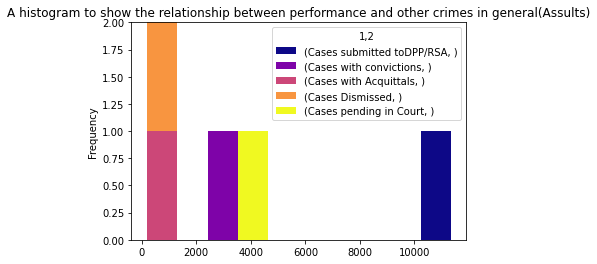

In [15]:
SubTotal.plot.hist(stacked=True, cmap='plasma',xlabel='Number of Cases' ,title='A histogram to show the relationship between performance and other crimes in general(Assults)')

In [16]:
# Actual Crimes under (f) Assaults when sub total is removed
Assults=OtherCrimes[0:3]
Assults


,1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
,2,,,,,
S/No.,CASE/CRIME INCIDENCES,,,,,
60,Aggravated Assault(Acid cases),2,1,0,0,1
61,Aggravated Assaults(general),3241,824,51,358,1562
62,Common Assaults,8100,1678,127,801,2852


In [17]:
# Displaying the sum of values of other crimes to be ploted on the graph
ByCat=Assults.sum(axis=1)
ByCat

S/No.  CASE/CRIME INCIDENCES         
60     Aggravated Assault(Acid cases)        4
61     Aggravated Assaults(general)       6036
62     Common Assaults                   13558
dtype: int64

<AxesSubplot:title={'center':'A bar graph showing Cases(Performance) under Assaults'}, xlabel='Category(Assaults)', ylabel='Number of CRIME INCIDENCES'>

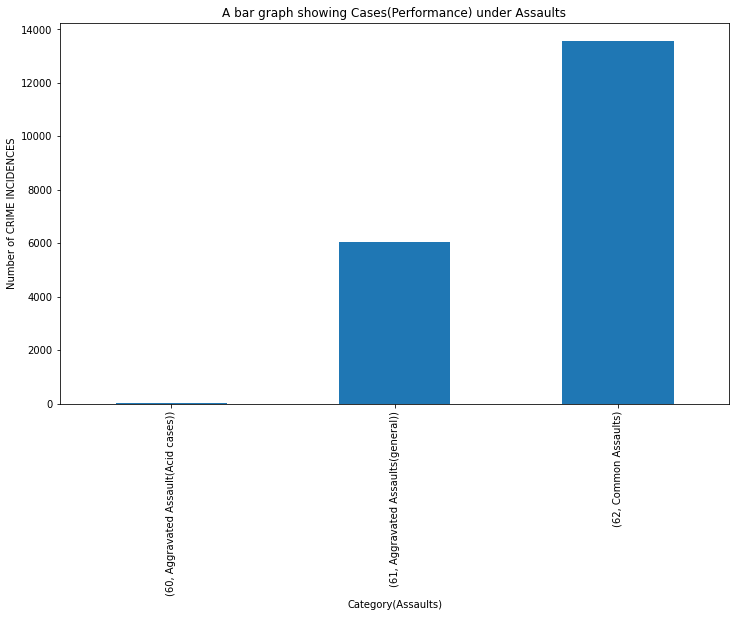

In [18]:
#Bargraph for Assaults
ByCat.plot.bar(figsize=(12,7),title='A bar graph showing Cases(Performance) under Assaults',ylabel='Number of CRIME INCIDENCES',xlabel='Category(Assaults)')

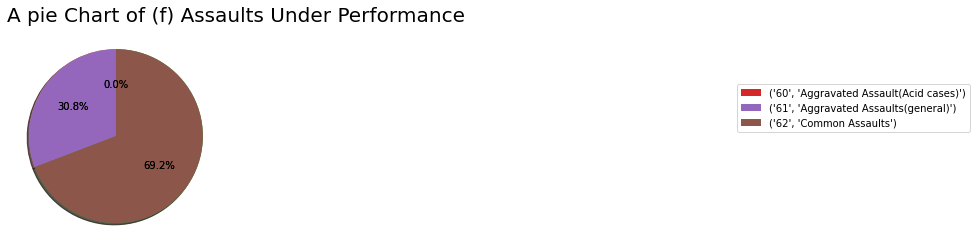

In [19]:
labels = list(ByCat.keys())
values = ByCat.values.tolist()
# Creating plot
fig1, ax1 = plt.subplots()
ax1.pie(values, autopct='%1.1f%%',shadow=True, startangle=90)
patches, texts, auto = ax1.pie(values, shadow=True, startangle=90, autopct='%1.1f%%')

#add justing the position of the legend on the pie char
plt.legend(patches, labels, bbox_to_anchor=(2.5,0.5), loc="lower right",bbox_transform=plt.gcf().transFigure)

#setting the title,its position and the fontsize
plt.title('A pie Chart of (f) Assaults Under Performance', loc='left',fontsize=20)

# show plot
plt.show()

In [20]:
#Determining the correlation of the (f) Assaults
Assults.corr()

,1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
,2,,,,,
1,2,,,,,
Cases submitted toDPP/RSA,,1.000000,0.994564,0.999998,0.998553,0.985616
Cases with convictions,,0.994564,1.000000,0.994752,0.998724,0.997856
Cases with Acquittals,,0.999998,0.994752,1.000000,0.998650,0.985923
Cases Dismissed,,0.998553,0.998724,0.998650,1.000000,0.993278
Cases pending in Court,,0.985616,0.997856,0.985923,0.993278,1.000000


In [21]:
#Describing the Assaults by performance
Assults.describe()

1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
2,,,,,
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,3781.000000,834.333333,59.333333,386.333333,1471.666667
std,4075.917197,838.547753,63.908789,401.250961,1427.645031
min,2.000000,1.000000,0.000000,0.000000,1.000000
25%,1621.500000,412.500000,25.500000,179.000000,781.500000
50%,3241.000000,824.000000,51.000000,358.000000,1562.000000
75%,5670.500000,1251.000000,89.000000,579.500000,2207.000000
max,8100.000000,1678.000000,127.000000,801.000000,2852.000000


In [22]:
# Line graph for the Data stored in variable Assults
Assults.iplot(kind='line',title='A line graph showing the relationship amongst Assults')

In [23]:
# Plotting a bar graph for ActualOtherCrimes
Assults.iplot(kind='bar',title='A bar graph showing the relationship amongst Assults')

# 2. PERSONS TAKEN TO COURT under(f) Assaults ¶

In [24]:
PTC=dcf['PERSONS TAKEN TO COURT']
PTC

1                                                  ACCUSED CHARGED  \
2                                                       Male Adult   
S/No. CASE/CRIME INCIDENCES                                          
      HOMICIDES                                                      
1     Death  (by shooting)                                      85   
2     Death (by mob action)                                    194   
3     Death (Poisoning)                                          9   
4     Death (Aggravated Domestic Violence)                     208   
5     Death(Fire Out Breaks)                                     8   
8     Other Death (Not Specified above)                       1062   
      Sub Total(Homicides)                                    1566   
      ECONOMIC CRIMES                                                
9     Embezzlement                                              10   
10    Causing Financial losss                                    3   
11    Abuse of office                                            0   
12    Counterfeiting                                           199   
13    Forgeries & Uttering of Documents                        196   
14    Issuing False Cheques                                     42   
15    Bank and Other Corporate Frauds                            2   
16    Obtaining By False Pretences                            2532   
17    Cyber (Computer) crimes                                   12   
18    Land Frauds                                               66   
19    Other Economic crimes                                     50   
      Sub Total(Economic crimes)                              3112   
      GENERAL CRIMES                                                 
      (a) Sex Related Offences                                       
20    Rape                                                     584   
21    Defilement                                              5199   
22    Indecent Assault                                         158   
23    Incest                                                    16   
24    Unnatural Offences                                        42   
      Sub Total(Sex Related)                                  5999   
      (b) Child Related Offences                                     
25    Child Neglect                                            343   
26    Child Desertion                                           58   
27    Child Stealing                                            21   
28    Child Trafficking                                         17   
29    Child Abduction/Kidnap                                    86   
31    Child Abuse/Torture                                       62   
32    Infanticide                                                1   
33    Abortion                                                   5   
      Sub Total(Child Related)                                 593   
      (c ) Breakings                                                 
34    Burglaries                                              3286   
35    House Breakings                                         1641   
36    Shop Breaking                                           1128   
37    Office Breaking                                          185   
38    Other Breakings (garage ,etc )                           870   
      Sub Total(Breakings)                                    7110   
      (d) Thefts                                                     
39    Theft of Motor Vehicles                                  305   
40    Theft of Motor Cycles                                   1664   
41    Theft from M/Vs (Spares)                                 410   
42    Theft from M/Vs (property)                               207   
43    Theft of Bicycles                                        451   
44    Theft of Computers(Laptops)                              233   
45    Thefts of Mobile Phones                                 1953   
46    Thef

# 2a)Accused convicted

In [25]:
#Picking Up only the Accused convicted under under PERSONS TAKEN TO COURT
PTC=PTC['ACCUSED CONVICTED']
PTC

2                                                  Male Adult Male Juven.  \
S/No. CASE/CRIME INCIDENCES                                                 
      HOMICIDES                                                             
1     Death  (by shooting)                                  4           0   
2     Death (by mob action)                                 3           0   
3     Death (Poisoning)                                     0           0   
4     Death (Aggravated Domestic Violence)                  7           1   
5     Death(Fire Out Breaks)                                0           0   
8     Other Death (Not Specified above)                    27           2   
      Sub Total(Homicides)                                 41           3   
      ECONOMIC CRIMES                                                       
9     Embezzlement                                          5           0   
10    Causing Financial losss                               0           0   
11    Abuse of office                                       0           0   
12    Counterfeiting                                       55           1   
13    Forgeries & Uttering of Documents                    51           0   
14    Issuing False Cheques                                 9           0   
15    Bank and Other Corporate Frauds                       0           0   
16    Obtaining By False Pretences                        771           3   
17    Cyber (Computer) crimes                               3           3   
18    Land Frauds                                           6           0   
19    Other Economic crimes                                 5           0   
      Sub Total(Economic crimes)                          905           7   
      GENERAL CRIMES                                                        
      (a) Sex Related Offences                                              
20    Rape                                                 12           1   
21    Defilement                                          714         129   
22    Indecent Assault                                     48           5   
23    Incest                                                5           0   
24    Unnatural Offences                                    5           0   
      Sub Total(Sex Related)                              784         135   
      (b) Child Related Offences                                            
25    Child Neglect                                       103           0   
26    Child Desertion                                      24           0   
27    Child Stealing                                        3           0   
28    Child Trafficking                                     0           0   
29    Child Abduction/Kidnap                               11           0   
31    Child Abuse/Torture                                  25           0   
32    Infanticide                                           0           0   
33    Abortion                                              2           0   
      Sub Total(Child Related)                            168           0   
      (c ) Breakings                                                        
34    Burglaries                                          876          43   
35    House Breakings                                     449          23   
36    Shop Breaking                                       267           7   
37    Office Breaking                                      40           1   
38    Other Breakings (garage ,etc )                      218          10   
      Sub Total(Breakings)                               1850          84   
      (d) Thefts                                                            
39    Theft of Motor Vehicles                              59           0   
40    Theft of Motor Cycles                               355           8   
41    Theft from M/Vs (Spares)                            110           3

In [26]:
# importing ACCUSED CONVICTED under General Crimes
Accusedconvicted=PTC[22:94]
Accusedconvicted

2                                                  Male Adult Male Juven.  \
S/No. CASE/CRIME INCIDENCES                                                 
      (a) Sex Related Offences                                              
20    Rape                                                 12           1   
21    Defilement                                          714         129   
22    Indecent Assault                                     48           5   
23    Incest                                                5           0   
24    Unnatural Offences                                    5           0   
      Sub Total(Sex Related)                              784         135   
      (b) Child Related Offences                                            
25    Child Neglect                                       103           0   
26    Child Desertion                                      24           0   
27    Child Stealing                                        3           0   
28    Child Trafficking                                     0           0   
29    Child Abduction/Kidnap                               11           0   
31    Child Abuse/Torture                                  25           0   
32    Infanticide                                           0           0   
33    Abortion                                              2           0   
      Sub Total(Child Related)                            168           0   
      (c ) Breakings                                                        
34    Burglaries                                          876          43   
35    House Breakings                                     449          23   
36    Shop Breaking                                       267           7   
37    Office Breaking                                      40           1   
38    Other Breakings (garage ,etc )                      218          10   
      Sub Total(Breakings)                               1850          84   
      (d) Thefts                                                            
39    Theft of Motor Vehicles                              59           0   
40    Theft of Motor Cycles                               355           8   
41    Theft from M/Vs (Spares)                            110           3   
42    Theft from M/Vs (property)                           65           0   
43    Theft of Bicycles                                   171           9   
44    Theft of Computers(Laptops)                          73           3   
45    Thefts of Mobile Phones                             657          45   
46    Theft of Bank Cash in Transit                        11           0   
47    Thefts of Cash                                      720          15   
48    Cattle Stealing                                    1233          20   
49    Theft of Telecom,Electrical & Comm Items             28           0   
50    Theft of Railway Slippers/Material                    1           0   
51    Receiving & Retaining(Stolen Prop)                   78           1   
52    Theft (property snatching-Bags,Neckless,etc)         18           2   
53    Theft of all  kinds (General )                     4987         211   
      Sub Total(Thefts)                                  8566         317   
      (e) Robberies                                                         
54    Aggravated Robbery(Motor Cycles)                      5           0   
55    Aggravated Robbery(Motor Vehicles)                    0           0   
56    Aggravated Robbery(Cash)                              1           0   
57    Aggravated   Robbery(general)                        34           0   
58    Cattle Rustling                                                       
59    Simple Robbery(general)                             352          20   
      Sub Total(Robberies)                                392          20   
      (f) Assaults                                                       

In [27]:
# specific column for (f)Assults Other Crimes in General(Performance) and converting the whole data to integers
Assults=Accusedconvicted[50:54].astype(int)
Assults

,2,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial
S/No.,CASE/CRIME INCIDENCES,,,,,,,
60,Aggravated Assault(Acid cases),1,0,0,0,0,0,1
61,Aggravated Assaults(general),729,20,151,2,73,382,1552
62,Common Assaults,1567,31,269,7,167,881,3132
,Sub Total(Assaults),2297,51,420,9,240,1263,4685


In [28]:
#displaying the Sub Total(Assaults))
SubTotal=Assults[3:]
SubTotal

,2,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial
S/No.,CASE/CRIME INCIDENCES,,,,,,,
,Sub Total(Assaults),2297,51,420,9,240,1263,4685


In [29]:
# Getting the total sum of Assults of the displaying the Sub Total under Accused convicted
TotalSum=SubTotal.sum(axis=1)
TotalSum

S/No.  CASE/CRIME INCIDENCES
       Sub Total(Assaults)      8965
dtype: int64

<AxesSubplot:title={'center':'A histogram to show the relationship between Accusedconvicted  and other crimes in general'}, ylabel='Frequency'>

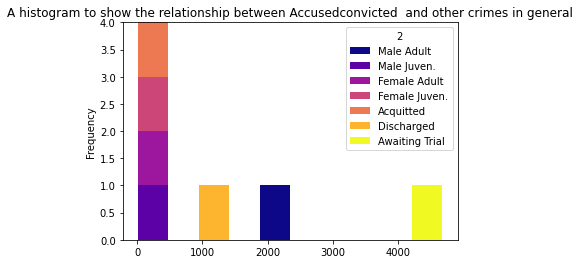

In [30]:
SubTotal.plot.hist(stacked=True, cmap='plasma',xlabel='Number of Cases' ,title='A histogram to show the relationship between Accusedconvicted  and other crimes in general')

In [31]:
# Actual Crimes under (g) Other Crimes in General of Accused convicted when sub-total is eliminated
ActualAccusedconvicted=Assults[0:3]
ActualAccusedconvicted

,2,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial
S/No.,CASE/CRIME INCIDENCES,,,,,,,
60,Aggravated Assault(Acid cases),1,0,0,0,0,0,1
61,Aggravated Assaults(general),729,20,151,2,73,382,1552
62,Common Assaults,1567,31,269,7,167,881,3132


In [32]:
# Displaying the sum of values of other crimes to be ploted on the graph
ByCat=ActualAccusedconvicted.sum(axis=1)
ByCat

S/No.  CASE/CRIME INCIDENCES         
60     Aggravated Assault(Acid cases)       2
61     Aggravated Assaults(general)      2909
62     Common Assaults                   6054
dtype: int64

<AxesSubplot:title={'center':'A bar graph showing Cases(Accused convicted) under Assaults'}, xlabel='Category(Assaults)', ylabel='Number of CRIME INCIDENCES'>

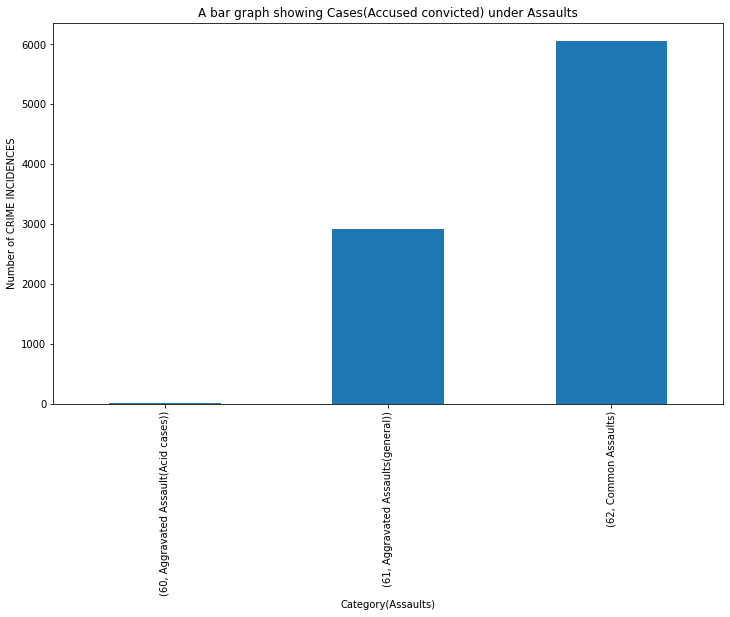

In [33]:
#Bargraph for Assaults
ByCat.plot.bar(figsize=(12,7),title='A bar graph showing Cases(Accused convicted) under Assaults',ylabel='Number of CRIME INCIDENCES',xlabel='Category(Assaults)')

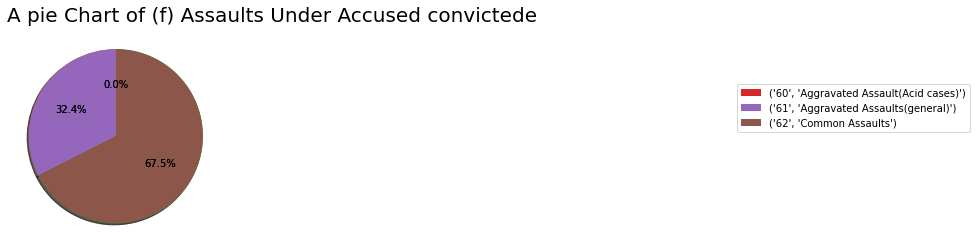

In [34]:
labels = list(ByCat.keys())
values = ByCat.values.tolist()
# Creating plot
fig1, ax1 = plt.subplots()
ax1.pie(values, autopct='%1.1f%%',shadow=True, startangle=90)
patches, texts, auto = ax1.pie(values, shadow=True, startangle=90, autopct='%1.1f%%')

#add justing the position of the legend on the pie char
plt.legend(patches, labels, bbox_to_anchor=(2.5,0.5), loc="lower right",bbox_transform=plt.gcf().transFigure)

#setting the title,its position and the fontsize
plt.title('A pie Chart of (f) Assaults Under Accused convictede', loc='left',fontsize=20)

# show plot
plt.show()

In [35]:
#Determining the correlation of the (f) Assaults
ActualAccusedconvicted.corr()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


2,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial
2,,,,,,,
Male Adult,1.000000,0.978733,0.993819,0.979661,0.999490,0.999352,0.999381
Male Juven.,0.978733,1.000000,0.995456,0.917663,0.971682,0.970717,0.985343
Female Adult,0.993819,0.995456,1.000000,0.951330,0.989767,0.989181,0.997109
Female Juven.,0.979661,0.917663,0.951330,1.000000,0.985570,0.986247,0.971996
Acquitted,0.999490,0.971682,0.989767,0.985570,1.000000,0.999992,0.997748
Discharged,0.999352,0.970717,0.989181,0.986247,0.999992,1.000000,0.997468
Awaiting Trial,0.999381,0.985343,0.997109,0.971996,0.997748,0.997468,1.000000


In [36]:
#Describing the Other Crimes by the accused convicted
ActualAccusedconvicted.describe()

2,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,765.666667,17.000000,140.000000,3.000000,80.000000,421.000000,1561.666667
std,783.643626,15.716234,134.836939,3.605551,83.719771,441.792938,1565.522384
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,365.000000,10.000000,75.500000,1.000000,36.500000,191.000000,776.500000
50%,729.000000,20.000000,151.000000,2.000000,73.000000,382.000000,1552.000000
75%,1148.000000,25.500000,210.000000,4.500000,120.000000,631.500000,2342.000000
max,1567.000000,31.000000,269.000000,7.000000,167.000000,881.000000,3132.000000


In [37]:
# Line graph for the Data stored in variable ActualAccusedconvicted
ActualAccusedconvicted.iplot(kind='line',title='A line graph showing the relationship amongst other crimes and Other Crimes by the accused convicted.')

In [38]:
# Plotting a bar graph for ActualOtherCrimes
ActualAccusedconvicted.iplot(kind='bar',title='A bar graph showing the relationship amongst other crimes in general')

KeyError: 'dimensions'

# 2b) ACCUSED CHARGED

In [ ]:
PA=dcf['PERSONS TAKEN TO COURT']
PA

In [ ]:
#Importing data about ACCUSED CHARGED
PC=PA['ACCUSED CHARGED']
PC

In [ ]:
# importing ACCUSED CHARGED under General Crimes
Accusedcharge=PC[22:94]
Accusedcharge

In [ ]:
# specific column for rows and columns Other Crimes in General and converting the objects to integer
Accusedcharge=Accusedcharge[50:54].astype(int)
Accusedcharge 

In [ ]:
#displaying the Sub Total(Assaults))
SubTotal=Accusedcharge[3:]
SubTotal

In [ ]:
# Getting the total sum of Assults of the displaying the Sub Total under Accused charged
TotalSum=SubTotal.sum(axis=1)
TotalSum

In [ ]:
SubTotal.plot.hist(stacked=True, cmap='plasma',xlabel='Number of Cases' ,title='A histogram to show the relationship between Accused charged  and other crimes in general')

In [ ]:
# Actual Crimes under (g) Other Crimes in General of Accusedcharge when sub-total is eliminated
Accusedcharge=Accusedcharge[0:3]
Accusedcharge

In [ ]:
# Displaying the sum of values of other crimes to be ploted on the graph
ByCat=Accusedcharge.sum(axis=1)
ByCat

In [ ]:
#Bargraph for Assaults
ByCat.plot.bar(figsize=(12,7),title='A bar graph showing Cases(Accused charged) under Assaults',ylabel='Number of CRIME INCIDENCES',xlabel='Category(Assaults)')

In [ ]:
labels = list(ByCat.keys())
values = ByCat.values.tolist()
# Creating plot
fig1, ax1 = plt.subplots()
ax1.pie(values, autopct='%1.1f%%',shadow=True, startangle=90)
patches, texts, auto = ax1.pie(values, shadow=True, startangle=90, autopct='%1.1f%%')

#add justing the position of the legend on the pie char
plt.legend(patches, labels, bbox_to_anchor=(2.5,0.5), loc="lower right",bbox_transform=plt.gcf().transFigure)

#setting the title,its position and the fontsize
plt.title('A pie Chart of (f) Assaults Under Accused charged', loc='left',fontsize=20)

# show plot
plt.show()

In [ ]:
#Determining the correlation of the (f) Assaults
Accusedcharge.corr()

In [ ]:
#Describing the Other Crimes by the accused convicted
Accusedcharge.describe()

In [ ]:
# Line graph for the Data stored in variable ActualAccusedconvicted
Accusedcharge.iplot(kind='line',title='A line graph showing the relationship amongst Assults by the accused convicted.')

In [ ]:
# Plotting a bar graph for ActualOtherCrimes
Accusedcharge.iplot(kind='bar',title='A bar graph showing the relationship amongst other crimes in general')

# 3. Reported Cases

In [ ]:
RC=dcf['REPORTED CASES']
RC

In [ ]:

# importing ACCUSED CONVICTED under General Crimes
reported=RC[22:94]
reported

In [ ]:
# specific column for rows and columns Other Crimes in General and converting the objects to integer
reported=reported[50:54].astype(int)
reported 

In [ ]:
#displaying the Sub Total(Assaults))
SubTotal=reported [3:]
SubTotal

In [ ]:
# Getting the total sum of Assults of the displaying the Sub Total under Accused charged
TotalSum=SubTotal.sum(axis=1)
TotalSum

In [ ]:
SubTotal.plot.hist(stacked=True, cmap='plasma',xlabel='Number of Cases' ,title='A histogram to show the relationship between Accused charged  and other crimes in general')

In [ ]:
# Actual Crimes under (g) Other Crimes in General of reported Assults when sub-total is eliminated
reported=reported[0:3]
reported

In [ ]:
# Displaying the sum of values of other crimes to be ploted on the graph
ByCat=reported.sum(axis=1)
ByCat

In [ ]:
#Bargraph for Assaults
ByCat.plot.bar(figsize=(12,7),title='A bar graph showing Cases(reported cases) under Assaults',ylabel='Number of CRIME INCIDENCES',xlabel='Category(Assaults)')

In [ ]:
labels = list(ByCat.keys())
values = ByCat.values.tolist()
# Creating plot
fig1, ax1 = plt.subplots()
ax1.pie(values, autopct='%1.1f%%',shadow=True, startangle=90)
patches, texts, auto = ax1.pie(values, shadow=True, startangle=90, autopct='%1.1f%%')

#add justing the position of the legend on the pie char
plt.legend(patches, labels, bbox_to_anchor=(2.5,0.5), loc="lower right",bbox_transform=plt.gcf().transFigure)

#setting the title,its position and the fontsize
plt.title('A pie Chart of (f) Assaults Under Reported Cases', loc='left',fontsize=20)

# show plot
plt.show()

In [ ]:
#Determining the correlation of the (f) Assaults
reported.corr()

In [ ]:
#Describing the Other Crimes by the reported cases
reported.describe()

In [ ]:
# Line graph for the Data stored in variable ActualAccusedconvicted
Accusedcharge.iplot(kind='line',title='A line graph showing the relationship amongst Assults by the reported cases.')

In [ ]:
# Plotting a bar graph for ActualOtherCrimes
Accusedcharge.iplot(kind='bar',title='A bar graph showing the relationship amongst Assaults by Reported Cases')

# 4. SENTENCES IMPOSED BY COURTS

#### 4a) IMPRISONMENT

In [ ]:
df = dcf['SENTENCES IMPOSED BY COURTS']['IMPRISONMENT']
df

In [ ]:
# importing imprisonment under General Crimes
imprisonment=df[22:94]
imprisonment

In [ ]:
#Selecting from Male Adult till COMM.WORK
imprisonment=imprisonment.loc[:,'Male Adult':'COMM. WORK']
imprisonment

In [ ]:
summs=imprisonment[50:54].astype(int)
summs

In [ ]:
# Actual Crimes under (g) Other Crimes in General by removing sub total from the list
summ=summs[0:3]
summ

In [ ]:
# Displaying the sum of values of other crimes to be ploted on the graph
ByCat=summ.sum(axis=1)
ByCat

In [ ]:
#Bargraph for Assaults
ByCat.plot.bar(figsize=(12,7),title='A bar graph showing Imprisonment by courts(imprisonment) under Assaults',ylabel='Number of CRIME INCIDENCES',xlabel='Category(Assaults)')

In [ ]:
labels = list(ByCat.keys())
values = ByCat.values.tolist()
# Creating plot
fig1, ax1 = plt.subplots()
ax1.pie(values, autopct='%1.1f%%',shadow=True, startangle=90)
patches, texts, auto = ax1.pie(values, shadow=True, startangle=90, autopct='%1.1f%%')

#add justing the position of the legend on the pie char
plt.legend(patches, labels, bbox_to_anchor=(2.5,0.5), loc="lower right",bbox_transform=plt.gcf().transFigure)

#setting the title,its position and the fontsize
plt.title('A pie Chart of (f) Assaults Under Reported Cases', loc='left',fontsize=20)

# show plot
plt.show()

In [ ]:
#Determining the correlation of the (f) Assaults
summ.corr()

In [ ]:
#Describing the imprisonment under General Crimes Assaults
summ.describe()

In [ ]:
# Line graph for the Data stored in variable ActualAccusedconvicted
summ.iplot(kind='line',title='A line graph showing the relationship amongst Assults by the imprisonement.')

In [ ]:
# Plotting a bar graph for ActualOtherCrimes
summ.iplot(kind='bar',title='A bar graph showing the relationship amongst Assaults by imprisonement')

In [ ]:
# Determining the percentage
s=summ.sum(axis=1)
summ.apply(lambda x: 100 * (x /s)).fillna(0).round(2)